# Steepest Gradient Descent Visualization with Hessian-Based Stepsize

This code is provided as supplementary material of the lecture Machine Learning and Optimization in Communications (MLOC).<br>

This code illustrates:
* Steepest gradient descent in two dimensions
* Interactive demonstration of step size influence
* Selection of stepsize $\epsilon$ such that second order expression decreases fastest

In [1]:
import importlib
import shutil
autograd_available = True
# if automatic differentiation is available, use it
try:
    import autograd
except ImportError:
    autograd_available = False
    pass

if autograd_available:
    import autograd.numpy as np    
    from autograd import grad, hessian
else:
    import numpy as np

import matplotlib.pyplot as plt
import matplotlib
from ipywidgets import interactive
import ipywidgets as widgets
%matplotlib inline 

font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True if shutil.which('latex') else False)
matplotlib.rcParams['text.latex.preamble']= r"\usepackage{amsmath}"

if autograd_available:
    print('Using autograd to compute gradients')
else:
    print('Using hand-calculated gradient')

Using autograd to compute gradients


Specify the function to minimize as a simple python function.<br>
We start with a very simple function that is given by
\begin{equation*}
f(\boldsymbol{x}) = \frac{1}{16}x_1^2 + 9x_2^2
\end{equation*}
The derivative is automatically computed using the autograd library, which returns a function that evaluates the gradient of myfun. The gradient can also be easily computed by hand and is given as
\begin{equation*}
\nabla f(\boldsymbol{x}) = \begin{pmatrix} \frac{1}{8}x_1 \\ 18x_2 \end{pmatrix}
\end{equation*}
The Hessian is easily computed by hand is given as
\begin{equation*}
\boldsymbol{H}(f(\boldsymbol{x})) = \begin{pmatrix} \frac{1}{8} & 0 \\ 0 & 18 \end{pmatrix}
\end{equation*}

In [2]:
# Valley
def myfun(x):
    return (x[0]**2)/16 + 9*(x[1]**2)

if autograd_available:
    gradient = grad(myfun)
    Hessian = hessian(myfun)
else:
    def gradient(x):
        grad = [x[0]/8, 18*x[1]]
        return grad;
    def Hessian(x):
        H = [[1/8, 0.0], [0.0, 18.0]]
        return np.array(H)

Plot the function as a 2d surface plot. Different colors indicate different values of the function.

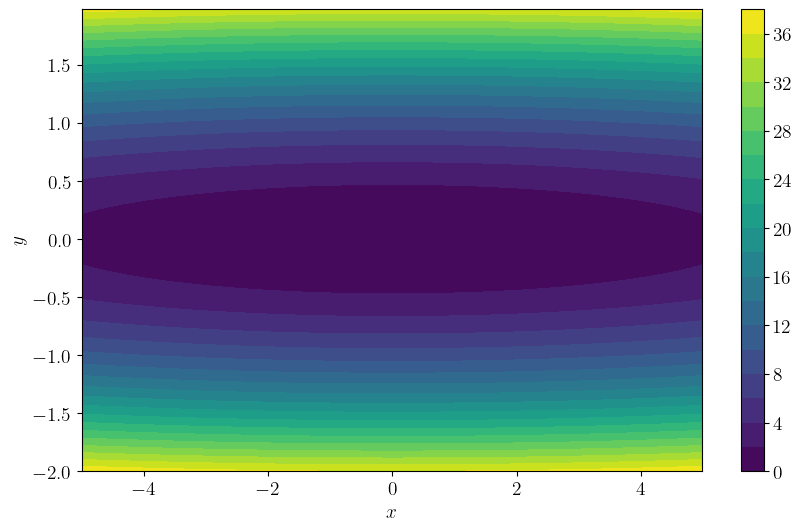

In [3]:
x = np.arange(-5.0, 5.0, 0.02)
y = np.arange(-2.0, 2.0, 0.02)
X, Y = np.meshgrid(x, y)

fZ = myfun([X,Y])

plt.figure(1,figsize=(10,6))
plt.rcParams.update({'font.size': 14})
plt.contourf(X,Y,fZ,levels=20)
plt.colorbar()
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

Carry out the simple gradient descent strategy by using only the sign of the gradient. Carry out 200 iterations (without using a stopping criterion). The values of epsilon and the starting point are specified

In [4]:
start = np.array([-4.0,-1.0])

points = []
while len(points) < 200:
    points.append( (start,myfun(start)) )
    
    g = gradient(start)
    H = Hessian(start)
    epsilon = (g @ g) / (g @ H @ g)
    start = start - np.array([epsilon*gradient(start)[0], epsilon*gradient(start)[1]])

Plot the trajectory and the value of the function (right subplot). Note that the minimum of this function is achieved for (0,0) and is 0

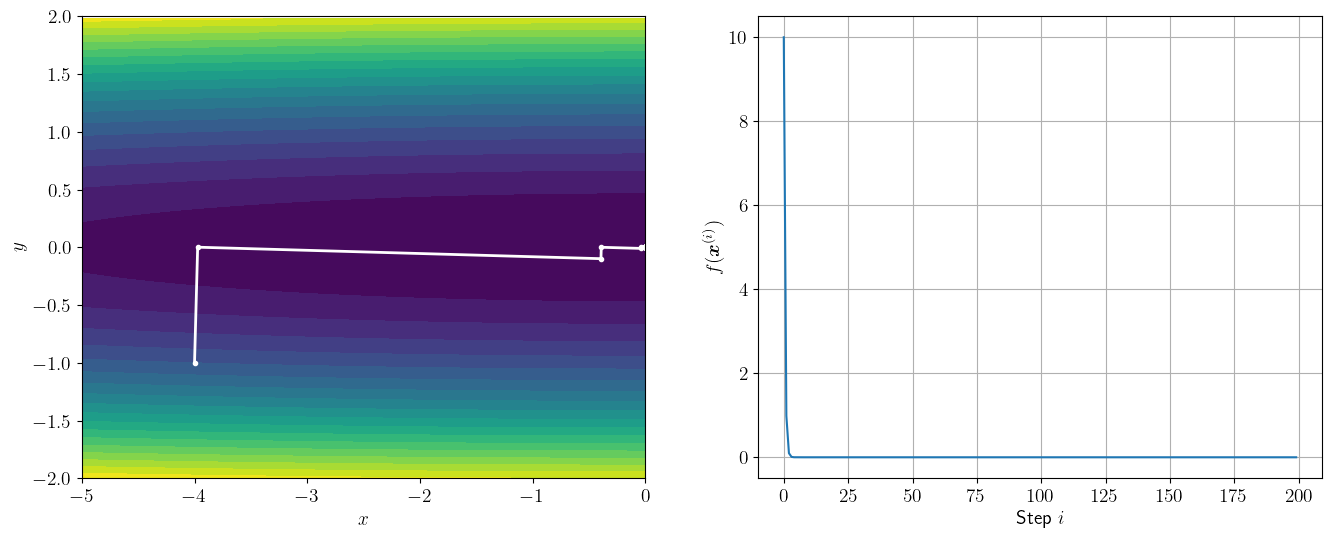

In [5]:
trajectory_x = [points[i][0][0] for i in range(len(points))]
trajectory_y = [points[i][0][1] for i in range(len(points))]

plt.figure(1,figsize=(16,6))
plt.subplot(121)
plt.rcParams.update({'font.size': 14})
plt.contourf(X,Y,fZ,levels=20)
plt.xlim(-5,0)
plt.ylim(-2,2)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.plot(trajectory_x, trajectory_y,marker='.',color='w',linewidth=2)

plt.subplot(122)
plt.plot(range(0,len(points)),list(zip(*points))[1])
plt.grid(True)
plt.xlabel("Step $i$")
plt.ylabel(r"$f(\boldsymbol{x}^{(i)})$")
plt.show()

This is an interactive demonstration of gradient descent, where you can specify yourself the starting point as well as the step value. You can see that depending on the step size, the minimization can get unstable

In [6]:
def plot_function(start_x, start_y):
    start = np.array([start_x,start_y])
    points = []
    while len(points) < 200:
        points.append( (start,myfun(start)) )
        g = gradient(start)
        H = Hessian(start)
        epsilon = (g @ g) / (g @ H @ g)
        
        start = start - np.array([epsilon*gradient(start)[0], epsilon*gradient(start)[1]])
    
    
    trajectory_x = [points[i][0][0] for i in range(len(points))]
    trajectory_y = [points[i][0][1] for i in range(len(points))]

    plt.figure(3,figsize=(15,5))
    plt.subplot(121)
    plt.rcParams.update({'font.size': 14})
    plt.contourf(X,Y,fZ,levels=20)
    plt.xlim(-5,0)
    plt.ylim(-2,2)
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.plot(trajectory_x, trajectory_y,marker='.',color='w',linewidth=2)

    plt.subplot(122)
    plt.plot(range(0,len(points)),list(zip(*points))[1])
    plt.grid(True)
    plt.xlabel("Step $i$")
    plt.ylabel(r"$f(\boldsymbol{x}^{(i)})$")
    plt.show()

In [7]:
epsilon_values = np.arange(0.0,0.12,0.0002)
interactive_update = interactive(plot_function, \
                               start_x = widgets.FloatSlider(min=-5.0,max=0.0,step=0.001,value=-4.0, continuous_update=False, description='x'), \
                               start_y = widgets.FloatSlider(min=-1.0, max=2.0, step=0.001, value=-2.0, continuous_update=False, description='y'))

output = interactive_update.children[-1]
output.layout.height = '430px'
interactive_update

interactive(children=(FloatSlider(value=-4.0, continuous_update=False, description='x', max=0.0, min=-5.0, ste…

Next, we consider the so-called Rosenbrock function, which is given by
\begin{equation*}
f(\boldsymbol{x}) = (1-x_1)^2 + 100(x_2-x_1^2)^2
\end{equation*}
Its gradient is given by
\begin{equation*}
\nabla f(\boldsymbol{x}) = \begin{pmatrix} -2(1-x_1)-400(x_2-x_1^2)x_1 \\ 200(x_2-x_1^2)\end{pmatrix}
\end{equation*}
Its Hessian is given by
\begin{equation*}
\boldsymbol{H}(f(\boldsymbol{x})) = \begin{pmatrix}
2 - 400(x_2 - 3x_1^2) & -400x_1 \\
-400x_1 & 200
\end{pmatrix}
\end{equation*}
The Rosenbrock function has a global minimum at (1,1) but is difficult to optimize due to its curved valley. For details, see <url>https://en.wikipedia.org/wiki/Rosenbrock_function</url>

In [8]:
# Rosenbrock function
def rosenbrock_fun(x):
    return (1-x[0])**2+100*((x[1]-(x[0])**2)**2)

if autograd_available:
    rosenbrock_gradient = grad(rosenbrock_fun)
    rosenbrock_Hessian = hessian(rosenbrock_fun)
else:
    def rosenbrock_gradient(x):
        grad = [-2*(1-x[0])-400*(x[1]-x[0]**2)*x[0], 200*(x[1]-x[0]**2)]
        return grad
    def rosenbrock_Hessian(x):
        H = np.array([[2 - 400*(x[1] - 3*x[0]**2), -400*x[0]], [-400*x[0], 200]])
        return H

def temp_rosenbrock_Hessian(x):
    H = np.array([[2 - 400*(x[1] - 3*x[0]**2), -400*x[0]], [-400*x[0], 200]])
    return H
        
xr = np.arange(-1.6, 1.6, 0.01)
yr = np.arange(-1.0, 3.0, 0.01)
Xr, Yr = np.meshgrid(xr, yr)
fZr = rosenbrock_fun([Xr,Yr])

def plot_function_rosenbrock(start_x, start_y):
    start = np.array([start_x,start_y])
    points = []
    while len(points) < 1000:
        points.append( (start,rosenbrock_fun(start)) )
        g = rosenbrock_gradient(start)
        H = rosenbrock_Hessian(start)
        epsilon = (g @ g) / (g @ H @ g)
                
        start = start - np.array([epsilon*g[0], epsilon*g[1]])
    
    
    trajectory_x = [points[i][0][0] for i in range(len(points))]
    trajectory_y = [points[i][0][1] for i in range(len(points))]

    plt.figure(4,figsize=(15,5))
    plt.subplot(121)
    plt.rcParams.update({'font.size': 14})
    plt.contourf(Xr,Yr,fZr,levels=20)
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.plot(trajectory_x, trajectory_y,marker='.',color='w',linewidth=2)
    plt.xlim((min(xr), max(xr)))
    plt.ylim((min(yr), max(yr)))
    
    plt.subplot(122)
    plt.plot(range(0,len(points)),list(zip(*points))[1])
    plt.grid(True)
    plt.xlabel("Step $i$")
    plt.ylabel(r'$f(\boldsymbol{x}^{(i)})$')
    plt.show()

In [9]:
epsilon_values = np.arange(0.0,0.007,0.00002)
interactive_update = interactive(plot_function_rosenbrock, \
                               start_x = widgets.FloatSlider(min=-1.6,max=1.6,step=0.0001,value=0.6, continuous_update=False, description='x'), \
                               start_y = widgets.FloatSlider(min=-1.0, max=3.0, step=0.0001, value=0.1, continuous_update=False, description='y'))

output = interactive_update.children[-1]
output.layout.height = '450px'
interactive_update

interactive(children=(FloatSlider(value=0.6, continuous_update=False, description='x', max=1.6, min=-1.6, step…